In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import rasterio
from rasterio.mask import mask
from shapely.geometry import shape, mapping
import matplotlib.pyplot as plt
from tqdm import tqdm
import yaml
import os

# Load configuration
with open('../../config.yaml', 'r') as file:
    config = yaml.safe_load(file)

def resolve_path(relative_path):
    return os.path.join(config['base_path'], relative_path)

In [5]:
CPIS_path = resolve_path(config['Combined_CPIS_shp_path'])
Arid_path = resolve_path(config['Africa_all_shp_path'])

CPIS_gdf = gpd.read_file(CPIS_path)
Arid_gdf = gpd.read_file(Arid_path)

# Make sure the coordinate systems are matching
CPIS_gdf.set_crs(epsg=4326, inplace = True)
Arid_gdf.set_crs(epsg = 4326, inplace = True)

print(CPIS_gdf.crs)
print(Arid_gdf.crs)

EPSG:4326
EPSG:4326


In [ ]:
# Function to check if the centroid of a geometry intersects with any features in the Arid Cropland shapefile
def check_centroid_intersect(geometry, arid_gdf):
    centroid = geometry.centroid
    return arid_gdf.geometry.intersects(centroid).any()

# Apply the function to each geometry in the CPIS GeoDataFrame with a progress bar
tqdm.pandas(desc="Checking centroids")
CPIS_gdf['centroid_in_arid_cropland'] = CPIS_gdf.geometry.progress_apply(lambda x: check_centroid_intersect(x, Arid_gdf))

# Filter out geometries whose centroids do not intersect with the Arid Cropland
inside_cpis_gdf = CPIS_gdf[CPIS_gdf['centroid_in_arid_cropland']]

# Check the amount of data inside the Arid Cropland
inside_count = inside_cpis_gdf.shape[0]


Checking geometries: 100%|██████████| 32364/32364 [06:28<00:00, 83.34it/s] 

Yes


Checking centroids: 100%|██████████| 32364/32364 [00:17<00:00, 1840.68it/s]


Number of CPIS geometries inside the Arid Cropland: 32258


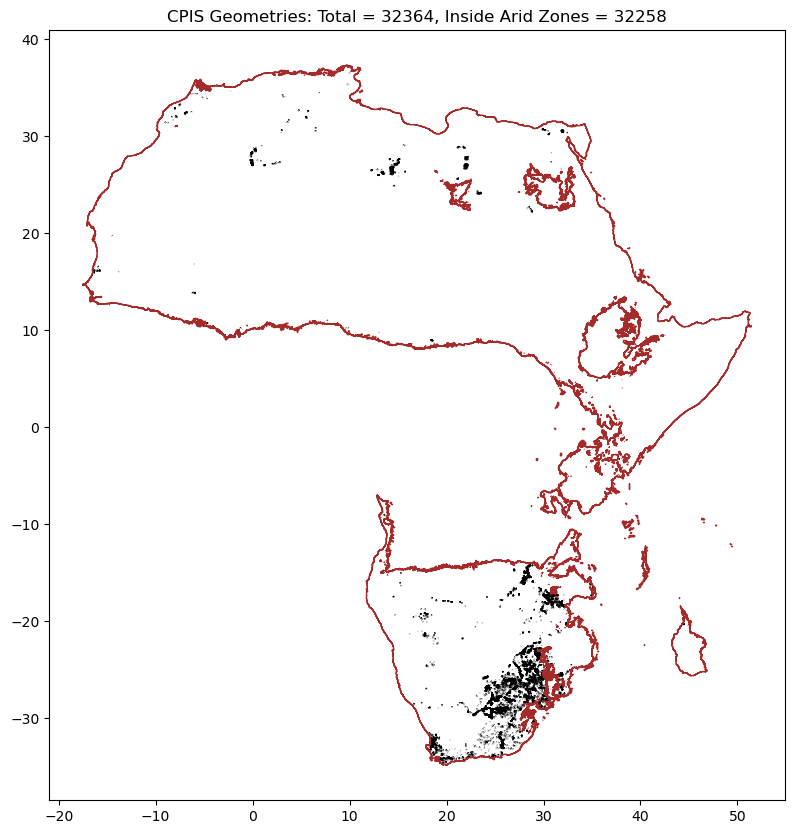

In [7]:
import geopandas as gpd
from shapely.geometry import Point
import yaml
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

# Load configuration
with open('../../config.yaml', 'r') as file:
    config = yaml.safe_load(file)

def resolve_path(relative_path):
    return os.path.join(config['base_path'], relative_path)

CPIS_path = resolve_path(config['Combined_CPIS_shp_path'])
Arid_Cropland_path = resolve_path(config['Africa_all_shp_path'])  # Path to Arid Cropland shapefile

# Load the CPIS shapefile
CPIS_gdf = gpd.read_file(CPIS_path)

# Load the Arid Cropland shapefile
Arid_Cropland_gdf = gpd.read_file(Arid_Cropland_path)

# Make sure the coordinate systems are matching
CPIS_gdf.set_crs(epsg=4326, inplace=True)
Arid_Cropland_gdf.set_crs(epsg=4326, inplace=True)

# Function to check if the centroid of a geometry intersects with any features in the Arid Cropland shapefile
def check_centroid_intersect(geometry, arid_cropland_gdf):
    centroid = geometry.centroid
    return arid_cropland_gdf.geometry.intersects(centroid).any()

# Apply the function to each geometry in the CPIS GeoDataFrame with a progress bar
tqdm.pandas(desc="Checking centroids")
CPIS_gdf['centroid_in_arid_cropland'] = CPIS_gdf.geometry.progress_apply(lambda x: check_centroid_intersect(x, Arid_Cropland_gdf))

# Filter out geometries whose centroids do not intersect with the Arid Cropland
inside_cpis_gdf = CPIS_gdf[CPIS_gdf['centroid_in_arid_cropland']]

# Check the amount of data inside the Arid Cropland
inside_count = inside_cpis_gdf.shape[0]

# Print the result
print(f"Number of CPIS geometries inside the Arid Cropland: {inside_count}")

# Save the result to a new shapefile
#inside_cpis_gdf.to_file(resolve_path(config['Inside_CPIS_shp_path']))

# Plot the result
base = CPIS_gdf.plot(color='blue', edgecolor='black', alpha=0.5, figsize=(10, 10))
inside_cpis_gdf.plot(ax=base, color='green', edgecolor='black')
Arid_Cropland_gdf.plot(ax=base, color='none', edgecolor='brown')  # Add Arid Cropland boundaries for reference
plt.title(f"CPIS Geometries: Total = {len(CPIS_gdf)}, Inside Arid Zones = {inside_count}")
plt.show()
